## Meteorite Landings Dataset Analysis

This notebook provides a comprehensive analysis of the "Meteorite Landings" dataset. The workflow includes data cleaning, exploration, and visualization to uncover meaningful insights about meteorite occurrences. Using Python libraries such as Pandas, Matplotlib, Seaborn, and Plotly, we analyze the dataset to understand geographical distributions, classifications, and temporal trends of meteorite landings. The notebook is structured to guide you through each step of the analysis, from data preprocessing to insightful visualizations and conclusions.

We begin by importing necessary libraries such as pandas, matplotlib.pyplot, numpy, seaborn, and plotly for data manipulation, visualization, and analysis. Also suppressing warnings to ensure a cleaner output during execution.


In [15]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
from plotly.offline import iplot

import warnings
warnings.simplefilter('ignore')

Now we'll need our dataset. This code block loads the dataset "Meteorite_Landings.csv" into a pandas DataFrame which will be used for further data analysis and visualization in subsequent cells.

In [16]:
# Dataset
df = pd.read_csv("Meteorite_Landings.csv")

Now we'll display the first few rows of the dataset using the `head()` method. This provides a quick overview of the data structure, including column names, data types, and sample values, which helps in understanding the dataset before performing further analysis.

In [17]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,Unnamed: 10
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN


Our next step is removing unnecessary columns from the dataset, specifically "Unnamed: 10", "GeoLocation", and "id". This step is performed to clean the data and retain only the relevant columns for analysis.

In [18]:
# Deleting unnecessary columns
df.drop(["Unnamed: 10", "GeoLocation", "id"], axis=1, inplace=True)

Now we have to standardize the column names in the dataset by replacing spaces with underscores. This ensures consistency and simplifies column referencing in subsequent analysis.

In [19]:
# Cleaning up column names
df.columns = df.columns.str.replace(" ", "_")

Next we'll display a comprehensive summary of the dataset by defining and using a custom `summary()` function. This function displays key information such as data shape, data types, missing values, duplicates, unique values, count, and descriptive statistics (minimum, maximum, mean, standard deviation). Additionally, it shows the first three values of each column to give a quick insight into the dataset's content.

In [20]:
# Dataframe summary
def summary(df):
    print(f"data shape: {df.shape}")
    summ = pd.DataFrame(df.dtypes, columns=["Data Type"])
    summ["Missing#"] = df.isna().sum()
    summ["Missing%"] = (df.isna().sum()) / len(df)
    summ["Dups"] = df.duplicated().sum()
    summ["Uniques"] = df.nunique().values
    summ["Count"] = df.count().values
    desc = pd.DataFrame(df.describe(include="all").transpose())
    summ["Min"] = desc["min"].values
    summ["Max"] = desc["max"].values
    summ["Average"] = desc["mean"].values
    summ["Standard Deviation"] = desc["std"].values
    summ["First Value"] = df.loc[0].values
    summ["Second Value"] = df.loc[1].values
    summ["Third Value"] = df.loc[2].values

    display(summ)


summary(df)

data shape: (45716, 8)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
name,object,0,0.000000,0,45716,45716,NaN,NaN,NaN,NaN,Aachen,Aarhus,Abee
nametype,object,0,0.000000,0,2,45716,NaN,NaN,NaN,NaN,Valid,Valid,Valid
recclass,object,0,0.000000,0,466,45716,NaN,NaN,NaN,NaN,L5,H6,EH4
mass_(g),float64,131,0.002866,0,12576,45585,0.0,60000000.0,13278.078549,574988.87641,21.0,720.0,107000.0
fall,object,0,0.000000,0,2,45716,NaN,NaN,NaN,NaN,Fell,Fell,Fell
year,float64,291,0.006365,0,265,45425,860.0,2101.0,1991.828817,25.052766,1880.0,1951.0,1952.0
reclat,float64,7315,0.160010,0,12738,38401,-87.36667,81.16667,-39.12258,46.378511,50.775,56.18333,54.21667
reclong,float64,7315,0.160010,0,14640,38401,-165.43333,354.47333,61.074319,80.647298,6.08333,10.23333,-113.0


Now that we have the summary of the dataset, we'll calculate the total number of missing values in the dataset using the `isna()` method followed by `sum()`. This helps in identifying the extent of missing data, which is crucial for deciding on data cleaning strategies.

In [21]:
# Count null data
df.isna().sum().sum()

np.int64(15052)

Along with missing data, we also have redundant data to deal with, so our next step is calculating the total number of duplicate rows in the dataset using the `duplicated()` method followed by `sum()`. This helps in identifying redundant data, which can be removed to ensure the dataset's integrity and accuracy during analysis.

In [22]:
# Count duplicates
df.duplicated().sum().sum()

np.int64(0)

Now that we've dealt with missing and duplicate data, we can generate descriptive statistics for numerical columns in the dataset, excluding object (categorical) data types. The statistics include measures such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum. The output is rounded to two decimal places.

In [23]:
# stats of numerical data
round(df.describe(exclude="object"), 2).style.background_gradient(cmap="BuPu")

,mass_(g),year,reclat,reclong
count,45585.000000,45425.000000,38401.000000,38401.000000
mean,13278.080000,1991.830000,-39.120000,61.070000
std,574988.880000,25.050000,46.380000,80.650000
min,0.000000,860.000000,-87.370000,-165.430000
25%,7.200000,1987.000000,-76.710000,0.000000
50%,32.600000,1998.000000,-71.500000,35.670000
75%,202.600000,2003.000000,0.000000,157.170000
max,60000000.000000,2101.000000,81.170000,354.470000


We can also generate descriptive statistics for categorical columns in the dataset, excluding numerical data types such as float and int64. The statistics include measures such as count, unique values, top (most frequent value), and frequency of the top value. The output is again rounded to two decimal places.

In [24]:
# stats of categorical data
round(df.describe(exclude=["float", "int64"]), 2).style.set_properties(
    **{"background-color": "#4A235A", "color": "#E2EEF3"}
)

,name,nametype,recclass,fall
count,45716,45716,45716,45716
unique,45716,2,466,2
top,Aachen,Valid,L6,Found
freq,1,45641,8285,44609


For the graphs, we'll visualize the distribution of numerical columns listed in `num_cols` using histograms with kernel density estimation (KDE). For each column, a histogram is plotted with 20 bins, and the KDE curve is overlaid to show the data's probability density. The plots are styled with a green color palette and include titles, axis labels, and gridlines for better readability. This helps in understanding the spread, central tendency, and shape of the data distribution for each numerical column.

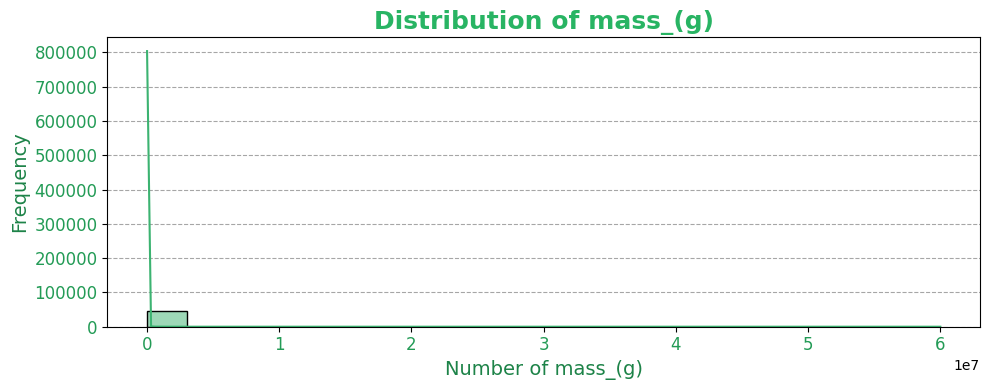

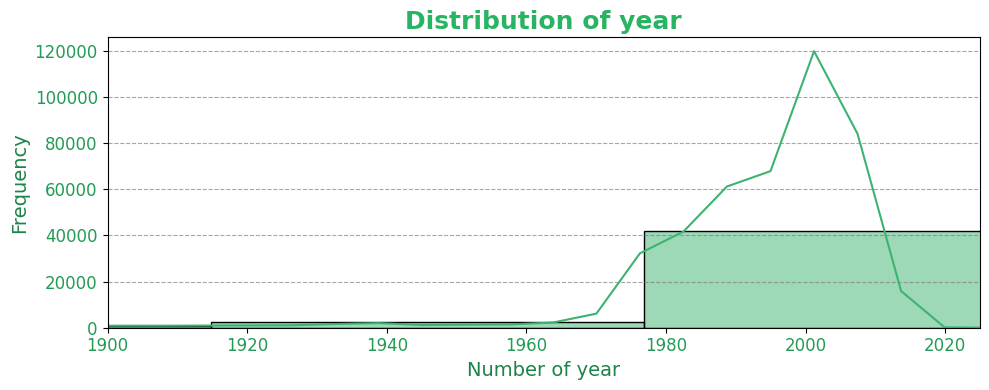

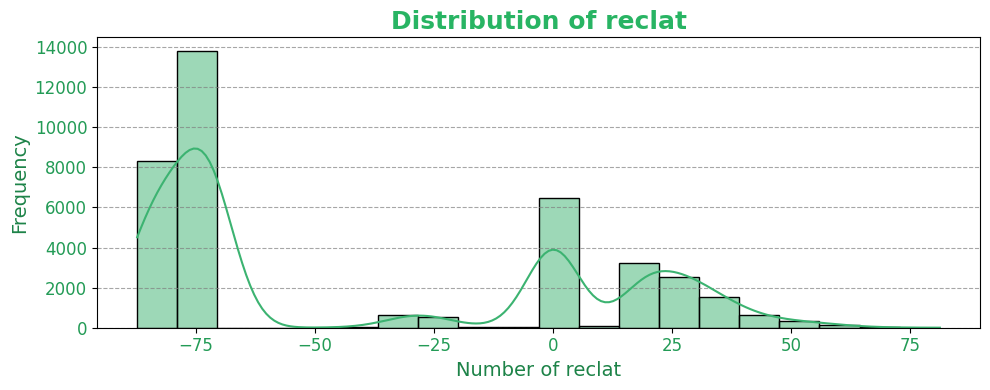

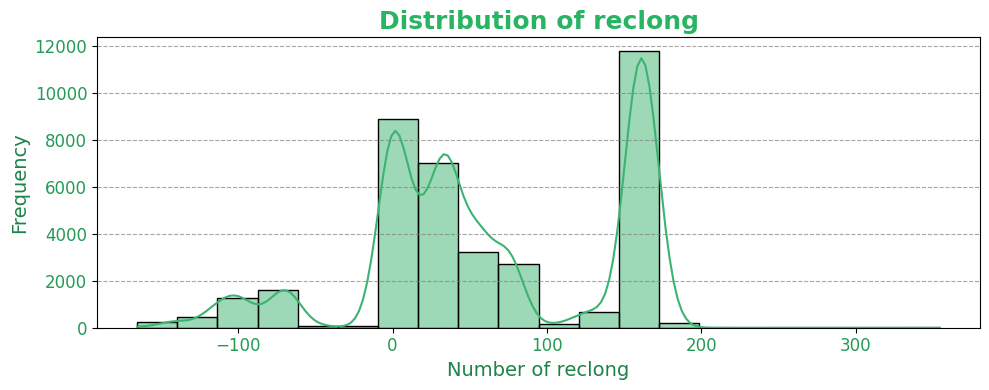

In [ ]:
# Distribution of num_cols
num_cols = ["mass_(g)", "year", "reclat", "reclong"]
for i in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[i], bins=20, kde=True, color="mediumseagreen")
    plt.title("Distribution of " + i, size=18, fontweight="bold", color="#28B463")
    plt.xlabel("Number of " + i, fontsize=14, color="#1D8348")
    plt.ylabel("Frequency", fontsize=14, color="#1D8348")
    plt.xticks(fontsize=12, color="#239B56")
    plt.yticks(fontsize=12, color="#239B56")
    plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")

    # Set x-axis limits for the 'year' column
    if i == "year":
        plt.xlim(1900, 2025)

    plt.tight_layout()
    plt.show()

We can get the geographical distribution of meteorite landings by plotting longitude (`reclong`) against latitude (`reclat`) for each meteorite. The data points are color-coded based on the "fall" column, which indicates whether the meteorite was "Fell" (observed falling) or "Found" (discovered later). This scatter plot provides insights into the spatial patterns of meteorite occurrences and their classification by fall type.

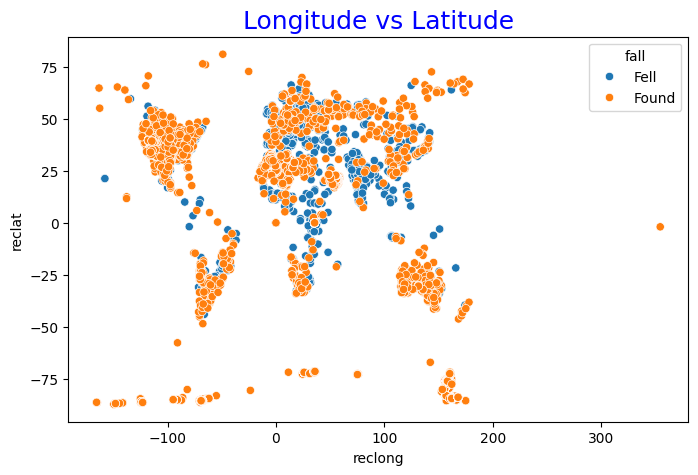

In [33]:
# Longitude vs Latitude per "fall"
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df, x="reclong", y="reclat", hue="fall")
plt.title("Longitude vs Latitude", fontsize=18, color="blue")
plt.show()

Here, the data points are color-coded based on the "nametype" column, which indicates the classification of the meteorite's name type, either Valid or Relict.

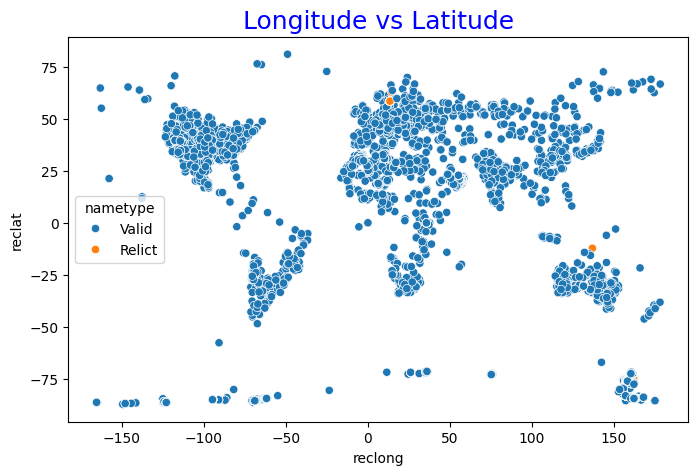

In [17]:
# Longitude vs Latitude per "nametype"
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df, x="reclong", y="reclat", hue="nametype")
plt.title("Longitude vs Latitude", fontsize=18, color="blue")
plt.show()

For the next trick, we'll visualize the top 10 meteorites by their mass in grams (`mass_(g)`) using a bar plot. The data is grouped by the `name` column, and the total mass for each meteorite is calculated. The top 10 meteorites with the highest mass are then selected and displayed in descending order.

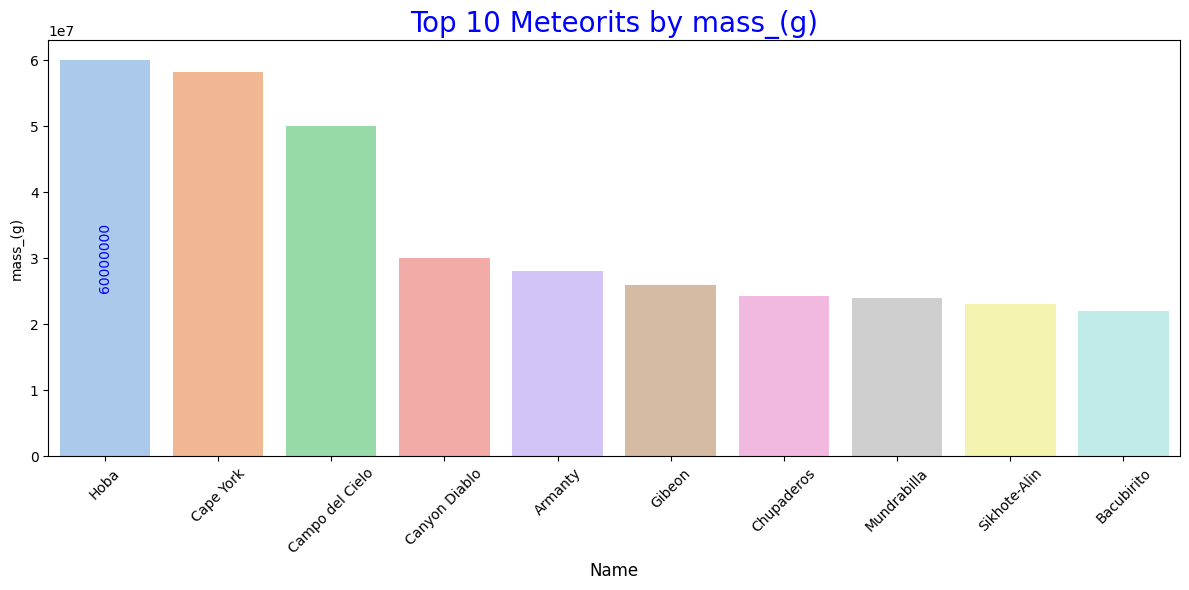

In [18]:
# Top 10 Meteorits by mass_(g)
fig, ax = plt.subplots(figsize=(12, 6))
char_bar = df.groupby(["name"])["mass_(g)"].sum().reset_index()
char_bar = char_bar.sort_values(by=("mass_(g)"), ascending=False)
df_top = char_bar.head(10)
sns.barplot(x=df_top["name"], y=df_top["mass_(g)"], palette="pastel")
plt.title(f"Top 10 Meteorits by mass_(g)", fontsize=20, color="blue")
ax.bar_label(
    ax.containers[0],
    fmt="%0.0f",
    rotation=90,
    fontsize=10,
    label_type="center",
    color="blue",
)
plt.xlabel("Name", fontsize=12)
plt.ylabel("mass_(g)", fontsize=10)
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

Our next piece of code identifies the top 10 most frequent meteorite classifications (`recclass`) in the dataset. The `value_counts()` method is used to count the occurrences of each unique classification, and the `nlargest(10)` method selects the top 10 classifications with the highest frequency. This analysis provides insights into the most common types of meteorites in the dataset.

In [19]:
# Top 10 Recclass by Frequency of Meteorites
items_counts = df["recclass"].value_counts(sort=False)
top = items_counts.nlargest(10)
print("Top 10 Recclass by Frequency of Meteorites", "\n", top)

Top 10 Recclass by Frequency of Meteorites 
 recclass
L6      8285
H5      7142
L5      4796
H6      4528
H4      4211
LL5     2766
LL6     2043
L4      1253
H4/5     428
CM2      416
Name: count, dtype: int64


Now we'll identify the top 10 years with the highest frequency of meteorite occurrences in the dataset. The `value_counts()` method is used to count the occurrences of each unique year, and the `nlargest(10)` method selects the top 10 years with the highest frequency. This analysis provides insights into the years when meteorite landings were most frequently recorded.

In [20]:
# Top 10 Years by Frequency of Meteorites
items_counts = df["year"].value_counts(sort=False)
top = items_counts.nlargest(10)
print("Top 10 Years by Frequency of Meteorites", "\n", top)

Top 10 Years by Frequency of Meteorites 
 year
2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
2002.0    2078
2004.0    1940
2000.0    1792
1997.0    1696
1999.0    1691
Name: count, dtype: int64


### Conclusion

In this notebook, we conducted a comprehensive analysis of the "Meteorite Landings" dataset. The workflow included data cleaning, exploration, and visualization to uncover meaningful insights. Key steps included:

1. **Data Cleaning**: We removed unnecessary columns, standardized column names, and addressed missing and duplicate data.
2. **Exploratory Data Analysis (EDA)**: 
    - Generated descriptive statistics for both numerical and categorical columns.
    - Visualized the distribution of numerical features using histograms and KDE plots.
    - Explored geographical patterns of meteorite landings through scatter plots.
    - Identified the top meteorites by mass, most frequent classifications, and years with the highest occurrences.
3. **Visualization**: Leveraged libraries like Matplotlib, Seaborn, and Plotly to create insightful and interactive visualizations.

This analysis provided valuable insights into the dataset, such as the geographical distribution of meteorites, their classifications, and temporal trends. These findings can serve as a foundation for further research or predictive modeling related to meteorite landings. Future work could include advanced machine learning techniques to predict meteorite characteristics or their likelihood of occurrence based on historical data.